1.Import packages

In [7]:
#dirty soln, but enables importing zfel to work.
import sys, os
parentdir = os.path.dirname(os.path.dirname(os.path.realpath('__file__')))
sys.path.append(parentdir) if parentdir not in sys.path else sys.path
print(sys.path)

['/Users/Sathya/Documents/SLAC/zfel/examples', '/Users/Sathya/anaconda3/envs/pyrecent/lib/python38.zip', '/Users/Sathya/anaconda3/envs/pyrecent/lib/python3.8', '/Users/Sathya/anaconda3/envs/pyrecent/lib/python3.8/lib-dynload', '', '/Users/Sathya/anaconda3/envs/pyrecent/lib/python3.8/site-packages', '/Users/Sathya/anaconda3/envs/pyrecent/lib/python3.8/site-packages/IPython/extensions', '/Users/Sathya/.ipython', '/Users/Sathya/Documents/SLAC/zfel']


In [8]:
import pandas as pd
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io
import random
import datetime
import time
#from zfel import sase1d_input_part
from zfel import sase1d_input_part

2.Input parameters

In [9]:
Nruns=1                             # Number of runs
npart   = 512                       # n-macro-particles per bucket 
s_steps = 30                    # n-sample points along bunch length
z_steps = 30                    # n-sample points along undulator
energy  = 4313.34*1E6               # electron energy [eV]
eSpread = 0#1.0e-4                  # relative rms energy spread [ ]
emitN   = 1.2e-6                    # normalized transverse emittance [m-rad]
currentMax = 3400                   # peak current [Ampere]
beta = 26                           # mean beta [meter]
unduPeriod = 0.03                   # undulator period [meter]
#unduK = 3.5                        # undulator parameter, K [ ]
unduK = np.ones(z_steps)*3.5 #np.arange(3.52,3.48,-0.04/(z_steps-1))#   # tapered undulator parameter, K [ ]
if unduK.shape[0]!=z_steps:
    print('Wrong! Number of steps should always be the same as z_steps')
unduL = 70#30                       # length of undulator [meter]
radWavelength = 1.5e-9              # seed wavelength? [meter], used only in single-freuqency runs
dEdz = 0                            # rate of relative energy gain or taper [keV/m], optimal~130
iopt = 'sase'                       # 'sase' or 'seeded'
P0 = 10000*0.0                      # small seed input power [W]
constseed = 1                       # whether we want to use constant random seed for reproducibility, 1 Yes, 0 No
particle_position=None #genfromtxt('./Inputs/particle_position.csv', delimiter=',') # or None  
# particle information with positions in meter and eta,\
# if we want to load random particle positions and energy, then set None
hist_rule='square-root'             # 'square-root' or 'sturges' or 'rice-rule' or 'self-design', number \
                                    #  of intervals to generate the histogram of eta value in a bucket

In [10]:
'''
Put input parameters into a inp_struct dict, for 1D FEL run
'''
inp_struct={'Nruns':Nruns,'npart':npart,'s_steps':s_steps,'z_steps':z_steps,'energy':energy,'eSpread':eSpread,\
            'emitN':emitN,'currentMax':currentMax,'beta':beta,'unduPeriod':unduPeriod,'unduK':unduK,'unduL':\
            unduL,'radWavelength':radWavelength,'dEdz':dEdz,'iopt':iopt,'P0':P0,'constseed':constseed,'particle_position':particle_position,'hist_rule':hist_rule}

3.1D FEL run

In [11]:
%load_ext autoreload
%autoreload
'''
Use sase function in sase1d.py to run 1D FEL
'''
z,power_z,s,power_s,rho,detune,field,\
field_s,gainLength,resWavelength,\
thet_out,eta_out,bunching,spectrum,freq,Ns,history=sase1d_input_part.sase(inp_struct)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


4.Print or plot the output

Text(0, 0.5, 'spectrum (W)')

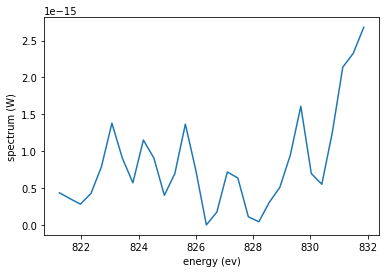

In [13]:
# plot spectrum
plt.plot(freq,spectrum[1:,-1])
plt.xlabel('energy (ev)')
plt.ylabel('spectrum (W)')

In [14]:
iopt

'sase'

/Users/Sathya/Documents/SLAC/zfel/zfel/sase1d_input_part.py:250: RuntimeWarning: divide by zero encountered in log10
  plt.plot(z,np.log10(power_z))
/Users/Sathya/Documents/SLAC/zfel/zfel/sase1d_input_part.py:270: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


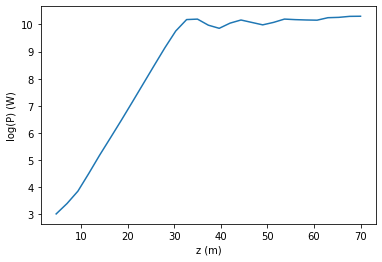

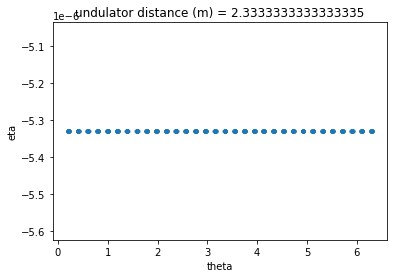

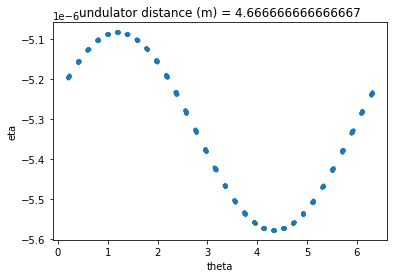

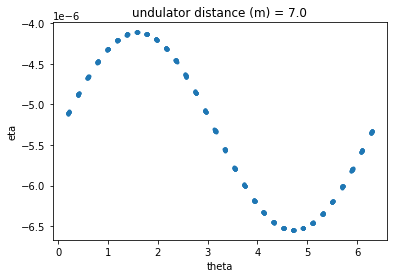

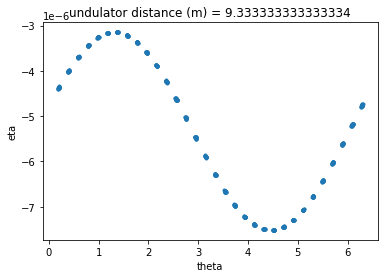

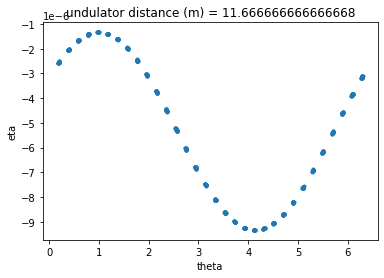

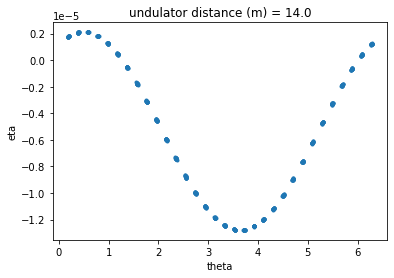

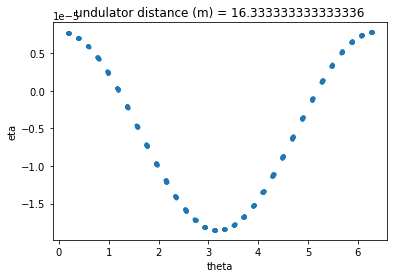

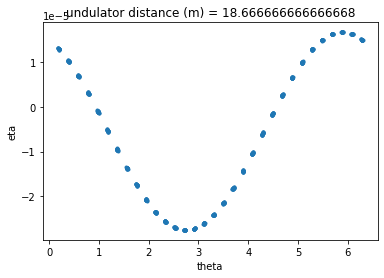

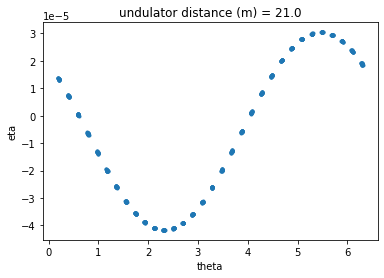

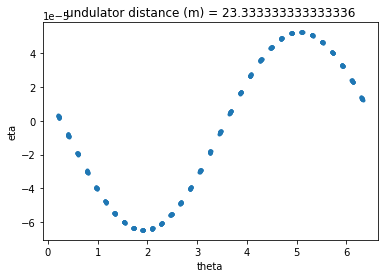

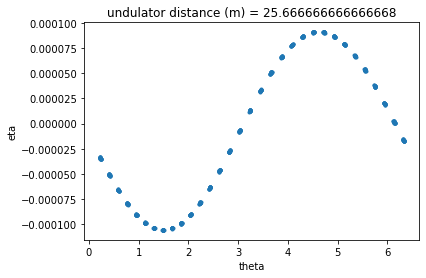

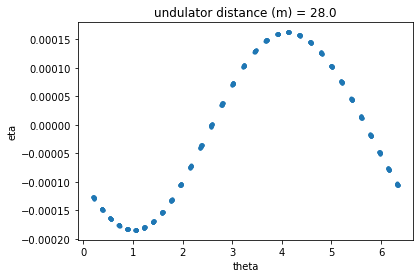

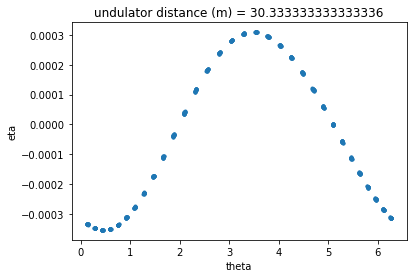

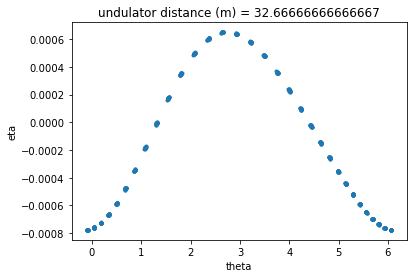

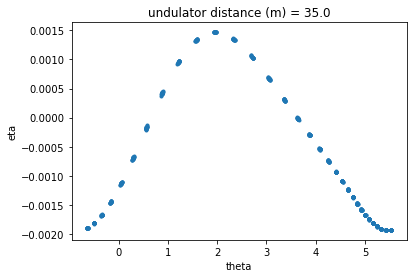

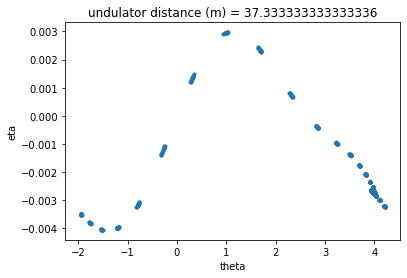

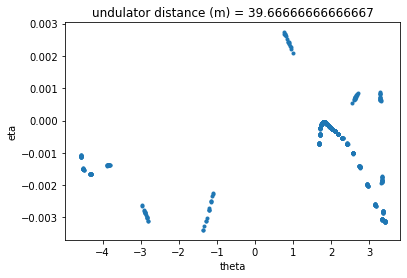

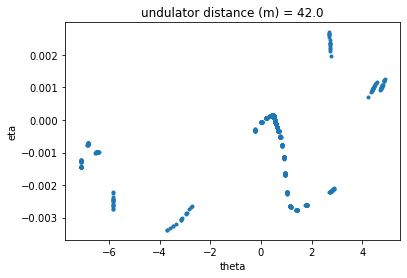

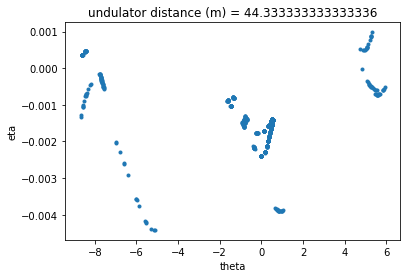

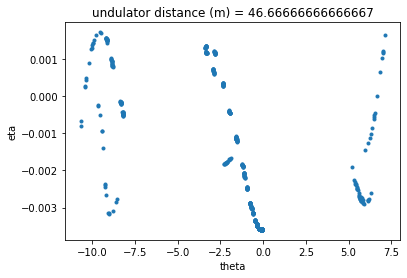

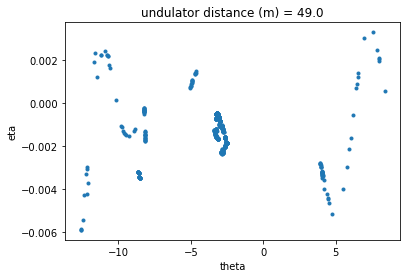

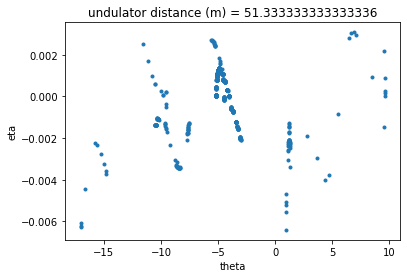

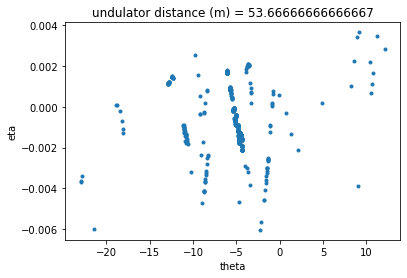

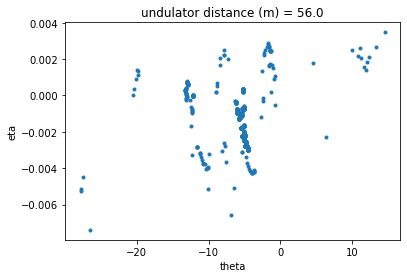

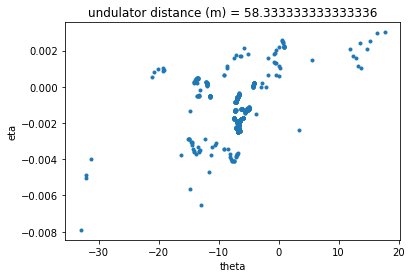

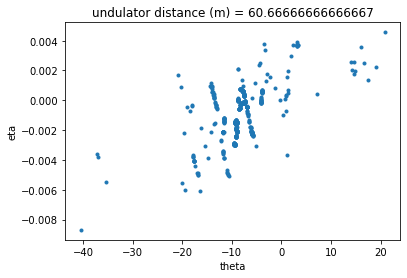

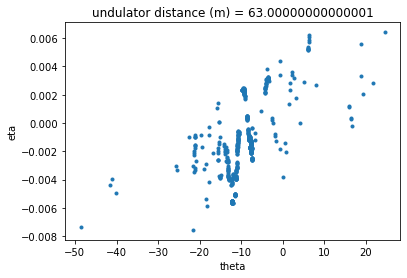

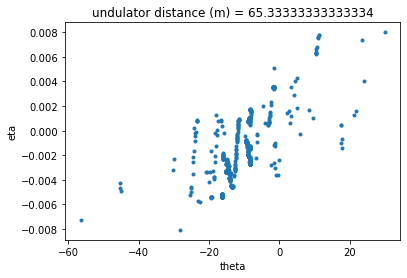

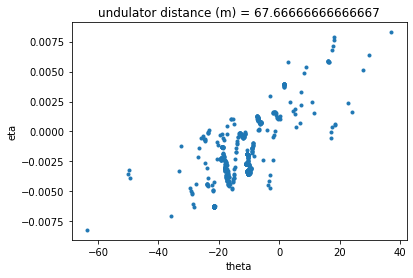

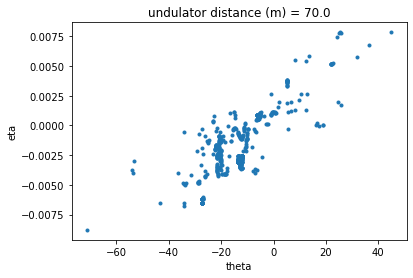

In [16]:
if iopt == '5':
    sase1d_input_part.plot_log_power_z(history)
    sase1d_input_part.plot_power_s(history)
    sase1d_input_part.plot_phase_space(history)
else:
    sase1d_input_part.plot_log_power_z(history)
    sase1d_input_part.plot_phase_space(history)

In [17]:
print(bunching[:,0])
print(np.sqrt(np.mean(np.absolute(bunching[:,0])**2)))
print(1/np.sqrt(Ns))

[ 1.23137807e-04-1.26875217e-04j -1.68326679e-04-1.82644267e-04j
 -1.98884138e-04-4.40512193e-04j  1.96540521e-04-1.47142144e-04j
 -1.50908752e-04-1.43280380e-04j -6.99194615e-05+1.05413382e-04j
  1.27648298e-04-1.40072704e-05j -3.37220230e-04-4.43258415e-04j
 -1.21969124e-04-9.31004351e-05j -8.32491716e-06-3.10492067e-04j
  3.19281681e-04+6.24472859e-05j  6.53934253e-06-2.34320522e-04j
 -1.80334003e-04+1.22363236e-04j -4.80468113e-04+2.89709799e-04j
 -2.06166668e-04-1.13028324e-04j  5.08354310e-05+4.11589180e-04j
  1.25932543e-04+6.85697890e-05j  6.50274047e-06+2.51804296e-04j
  1.43572205e-04+1.16056302e-04j  9.30649788e-05+1.45069397e-04j
  1.41544838e-04+1.59888180e-04j -2.55481142e-04-9.77844618e-05j
 -1.94574893e-04+1.44455396e-04j -4.85980521e-05+1.23793953e-04j
  7.11264301e-05+5.21923690e-05j -1.46337539e-04-3.16817708e-04j
  4.46075656e-05+2.46842098e-04j -3.98610928e-05-1.06292690e-04j
  1.50335870e-04+4.68960531e-04j -1.09727074e-04+2.76598639e-04j]
0.00029007311150922217
0

In [18]:
print(rho)
print(detune)
print(gainLength)
print(resWavelength)
print(thet_out,eta_out)

[0.00095382 0.00095382 0.00095382 0.00095382 0.00095382 0.00095382
 0.00095382 0.00095382 0.00095382 0.00095382 0.00095382 0.00095382
 0.00095382 0.00095382 0.00095382 0.00095382 0.00095382 0.00095382
 0.00095382 0.00095382 0.00095382 0.00095382 0.00095382 0.00095382
 0.00095382 0.00095382 0.00095382 0.00095382 0.00095382 0.00095382]
[-1.34639685 -1.25663706 -1.16687727 -1.07711748 -0.98735769 -0.8975979
 -0.80783811 -0.71807832 -0.62831853 -0.53855874 -0.44879895 -0.35903916
 -0.26927937 -0.17951958 -0.08975979  0.          0.08975979  0.17951958
  0.26927937  0.35903916  0.44879895  0.53855874  0.62831853  0.71807832
  0.80783811  0.8975979   0.98735769  1.07711748  1.16687727  1.25663706
  1.34639685]
1
1.4999920058175574e-09
0 0


In [19]:
print(z)
print(power_z)
print(s)
print(power_s)
print(field)
print(field_s)
print(bunching)

[ 2.33333333  4.66666667  7.          9.33333333 11.66666667 14.
 16.33333333 18.66666667 21.         23.33333333 25.66666667 28.
 30.33333333 32.66666667 35.         37.33333333 39.66666667 42.
 44.33333333 46.66666667 49.         51.33333333 53.66666667 56.
 58.33333333 60.66666667 63.         65.33333333 67.66666667 70.        ]
[0.00000000e+00 1.02290766e+03 2.47351864e+03 7.07761292e+03
 3.18084938e+04 1.51034558e+05 6.62761492e+05 2.95092148e+06
 1.36110916e+07 6.38136199e+07 2.99436800e+08 1.37983985e+09
 5.74297702e+09 1.51788801e+10 1.57782655e+10 9.42704594e+09
 7.22466634e+09 1.12260160e+10 1.46271342e+10 1.19101327e+10
 9.69196310e+09 1.19525409e+10 1.58219434e+10 1.50959717e+10
 1.46652966e+10 1.44145348e+10 1.77949546e+10 1.83265716e+10
 1.99451387e+10 2.01424215e+10]
[0.11666604 0.23333209 0.34999813 0.46666418 0.58333022 0.69999627
 0.81666231 0.93332836 1.0499944  1.16666045 1.28332649 1.39999254
 1.51665858 1.63332463 1.74999067 1.86665672 1.98332276 2.09998881
 2.216